In [44]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()


Saving data_raw.xlsx to data_raw (3).xlsx


In [46]:
# Load the dataset
dataset =pd.read_excel('data_raw.xlsx')

In [47]:
dataset.head(5)

,Account,ATMID',CalDate,Dispense,DT,MaxCapacity,CountTotalTxn
0,ABC,SPCN02020,2021-01-01,564500,0,2640000,157
1,ABC,TPCN10269,2021-01-01,509000,9,3520000,92
2,ABC,APCN00816,2021-01-01,64800,0,2640000,36
3,PQR,S1CN1142,2021-01-01,834500,0,3520000,101
4,PQR,S1CN2022,2021-01-01,825700,0,2860000,364


In [48]:
#Checking how big is data
dataset.shape

(14593, 7)

In [49]:
#Checking datatypes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14593 entries, 0 to 14592
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Account           14593 non-null  object        
 1   ATMID'            14593 non-null  object        
 2   CalDate           14593 non-null  datetime64[ns]
 3   Dispense          14593 non-null  int64         
 4   DT                14593 non-null  int64         
 5   MaxCapacity       14593 non-null  int64         
 6   CountTotalTxn     14593 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 798.2+ KB


In [50]:
#Checking if there are any missing values
dataset.isnull().sum()

Account             0
ATMID'              0
CalDate             0
Dispense            0
DT                  0
MaxCapacity         0
CountTotalTxn       0
dtype: int64

In [51]:
#Checking how data looks mathematically
dataset.describe()

,Dispense,DT,MaxCapacity,CountTotalTxn
count,1.459300e+04,14593.000000,1.459300e+04,14593.000000
mean,4.027993e+05,158.538614,3.279753e+06,105.322963
std,3.036762e+05,356.073765,3.974770e+05,76.727151
min,0.000000e+00,0.000000,2.420000e+06,0.000000
25%,1.685000e+05,0.000000,2.860000e+06,45.000000
50%,3.653000e+05,0.000000,3.520000e+06,98.000000
75%,5.780000e+05,64.000000,3.520000e+06,146.000000
max,2.151800e+06,1440.000000,3.740000e+06,561.000000


In [52]:
#Checking if there are any duplicate value
dataset.duplicated().sum()

0

<ipython-input-54-a0efa3aba249>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True)


<Axes: >

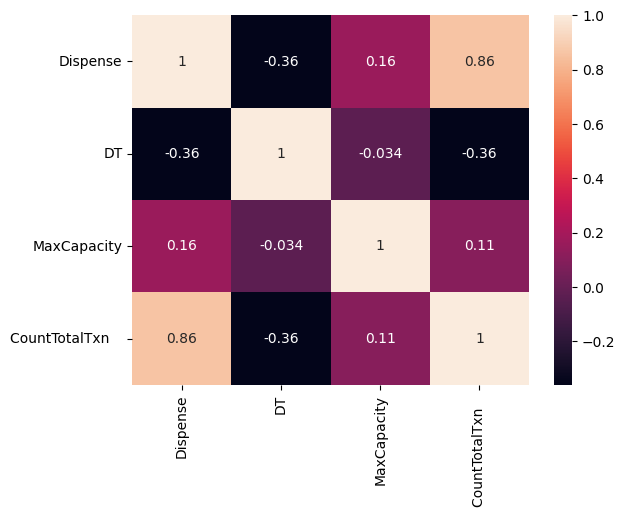

In [54]:
#Checking Correlation between columns
sns.heatmap(dataset.corr(), annot=True)

Dispense and CountTotalTxn are highly correlated

In [ ]:
# Sort the dataset by ATMID' and caldate

dataset.sort_values(by=["ATMID'","CalDate   "], inplace=True)

In [ ]:
# Group the dataset by ATMID' and aggregate dispense amounts
grouped_dataset = dataset.groupby("ATMID'")['Dispense'].apply(list)

In [ ]:
# Create a DataFrame to store the forecast results
forecast_results = pd.DataFrame(columns=['ATMID', 'Date', 'Forecast'])

In [ ]:
# Iterate over each ATMID and perform the forecast
for atm_id, dispense_list in grouped_dataset.items():
    # Convert the dispense list to a numpy array
    dispense_array = np.array(dispense_list)

    # Create the ARIMA model and fit it to the dispense data
    model = ARIMA(dispense_array, order=(1, 1, 1))
    model_fit = model.fit()

    # Get the last observed value for forecasting
    last_observed = dispense_array[-1]

    # Generate the forecasts for the next 7 days
    forecasts = model_fit.forecast(steps=7)

    # Create a DataFrame for the forecasts
    start_date = dataset['CalDate   '].max() + pd.DateOffset(days=1)
    forecast_dates = pd.date_range(start=start_date, periods=7, freq='D')
    atm_forecast = pd.DataFrame({'ATMID': atm_id,
                                 'Date': forecast_dates,
                                 'Forecast': forecasts})

    # Append the ATM forecasts to the overall forecast results DataFrame
    forecast_results = forecast_results.append(atm_forecast)

# Print the forecast results
print(forecast_results)

<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_results = forecast_results.append(atm_forecast)
<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_results = forecast_results.append(atm_forecast)
<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_results = forecast_results.append(atm_forecast)
<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_results = forecast_results.append(atm_forecast)
<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated

        ATMID       Date       Forecast
0   APAN11109 2023-02-23  344377.337108
1   APAN11109 2023-02-24  370416.605477
2   APAN11109 2023-02-25  381031.379478
3   APAN11109 2023-02-26  385358.437577
4   APAN11109 2023-02-27  387122.340586
..        ...        ...            ...
2   TPCN10269 2023-02-25  599759.448484
3   TPCN10269 2023-02-26  600483.025650
4   TPCN10269 2023-02-27  600653.831234
5   TPCN10269 2023-02-28  600694.151118
6   TPCN10269 2023-03-01  600703.668916

[147 rows x 3 columns]


<ipython-input-18-6b526534bb45>:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  forecast_results = forecast_results.append(atm_forecast)


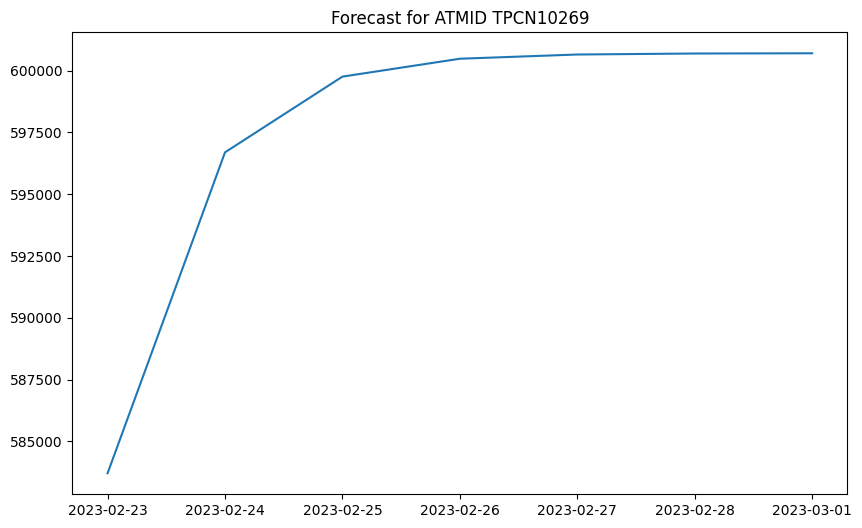

In [ ]:
# Visualize the forecast for each ATMID
for atmid in atm_forecast["ATMID"].unique():
  df_filtered = atm_forecast.loc[atm_forecast["ATMID"] == atmid]
  plt.figure(figsize=(10, 6))
  plt.plot(df_filtered["Date"], df_filtered["Forecast"])
  plt.title(f"Forecast for ATMID {atmid}")
  plt.show()


In [57]:
import csv
from google.colab import files
# Export the forecast results to CSV
with open('forecast_results.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(['ATMID', 'Date', 'Forecast'])
    writer.writerows(forecast_results.to_records())
    files.download('forecast_results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
# Check the accuracy of the forecast
actual_values = dataset[dataset["ATMID'"] == atm_id]['Dispense'].iloc[-7:]
errors = actual_values - forecasts
mae = np.mean(np.abs(errors))
rmse = np.sqrt(np.mean(errors**2))

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

MAE: 92940.48773451698
RMSE: 107712.10021724665


Reasons for choosing MAE and RMSE as accuracy metrics:


*   MAE and RMSE are both scale-invariant, which means that they are not affected by the scale of the data. This is important because it allows us to compare the accuracy of forecasts for different datasets, even if the datasets have different units of measurement.
*   MAE and RMSE are both easy to interpret. The MAE is the average of the absolute errors, while the RMSE is the square root of the average of the squared errors. This makes it easy to understand how accurate the forecast is.
*   MAE and RMSE are both sensitive to outliers. This means that they are not affected by a few very large or very small errors. This is important because outliers can sometimes occur in real-world data, and we want our accuracy metrics to be able to capture them.

In general, MAE is a good choice for accuracy metrics when the errors are evenly distributed, while RMSE is a good choice when the errors are not evenly distributed. However, both metrics can be used to measure the accuracy of a forecast.